<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/Diferencias%20progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Diferencias progresivas**

Use los tamaños de paso  

a) $h=0.1$ y $k=0.0005$

b) $h=0.1$ y $k=0.01$

para aproximar la solución de la ecuación de calor

$$  \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < 1, \; \quad t \geq 0  $$

con condiciones de frontera
$$ u(0,t)=u(1,t)=0, \quad t>0 $$

y condición inicial
$$u(x,0)=\sin(\pi x), \quad 0 \leq x \leq 1 $$

Comparar los resultados en $t=0.5$ con la solución exacta
$$ u(x,t)=e^{-\pi^2 t}\sin(\pi x) $$

In [22]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Función de la solución exacta
def sol_exacta(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

In [24]:
def dif_progresivas(h, k, t_final=0.5):
    x = np.arange(0, 1 + h, h)
    n = len(x)
    r = k / h**2

    # Condición inicial
    w = np.sin(np.pi * x)
    w[0] = w[-1] = 0  # Fronteras

    t = 0
    while t < t_final:
        w_new = np.copy(w)
        for i in range(1, n-1):
            w_new[i] = w[i] + r*(w[i+1] - 2*w[i] + w[i-1])
        w = w_new
        t += k

    return x, w

In [25]:
h = 0.1
k1 = 0.0005
k2 = 0.01

x1, w1 = dif_progresivas(h, k1)
x2, w2 = dif_progresivas(h, k2)


In [26]:
t_final = 0.5
valores_exactos = sol_exacta(x1, t_final)

tabla = pd.DataFrame({
    'x_i': x1,
    'u(x_i, 0.5)': valores_exactos,
    'w_i (k=0.0005)': w1,
    '|Error| (k=0.0005)': np.abs(valores_exactos - w1),
    'w_i (k=0.01)': w2,
    '|Error| (k=0.01)': np.abs(valores_exactos - w2)
})

tabla


,x_i,"u(x_i, 0.5)",w_i (k=0.0005),|Error| (k=0.0005),w_i (k=0.01),|Error| (k=0.01)
0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
1,0.1,2.222414e-03,0.002287,6.410661e-05,-30266.270026,3.026627e+04
2,0.2,4.227283e-03,0.004349,1.219380e-04,60588.054981,6.058805e+04
3,0.3,5.818356e-03,0.005986,1.678333e-04,-89862.842345,8.986285e+04
4,0.4,6.839888e-03,0.007037,1.972999e-04,115225.537917,1.152255e+05
5,0.5,7.191883e-03,0.007399,2.074533e-04,-132328.392814,1.323284e+05
6,0.6,6.839888e-03,0.007037,1.972999e-04,136478.815915,1.364788e+05
7,0.7,5.818356e-03,0.005986,1.678333e-04,-124251.368517,1.242514e+05
8,0.8,4.227283e-03,0.004349,1.219380e-04,94976.581153,9.497658e+04
9,0.9,2.222414e-03,0.002287,6.410661e-05,-51519.548023,5.151955e+04


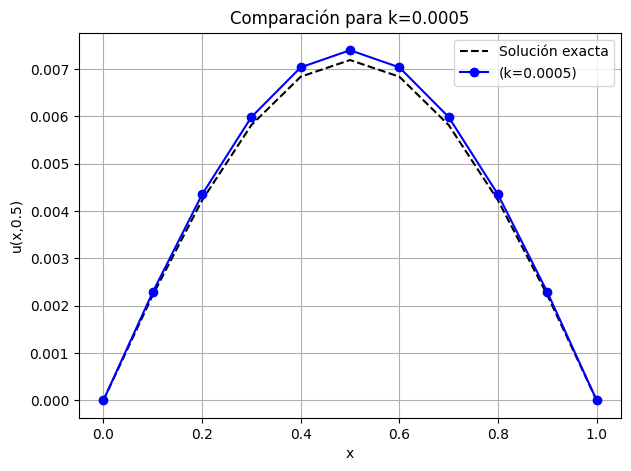

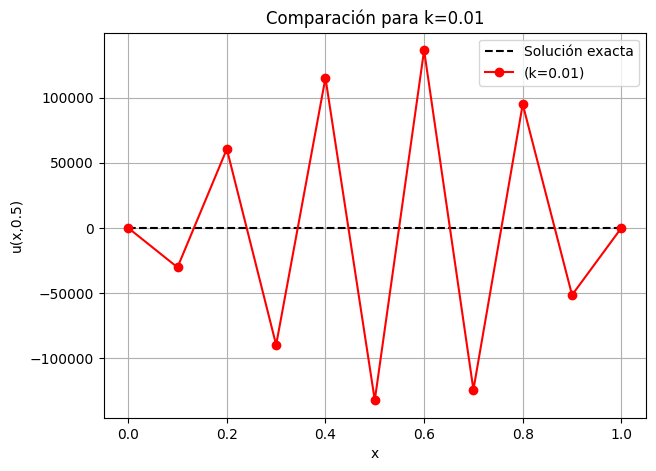

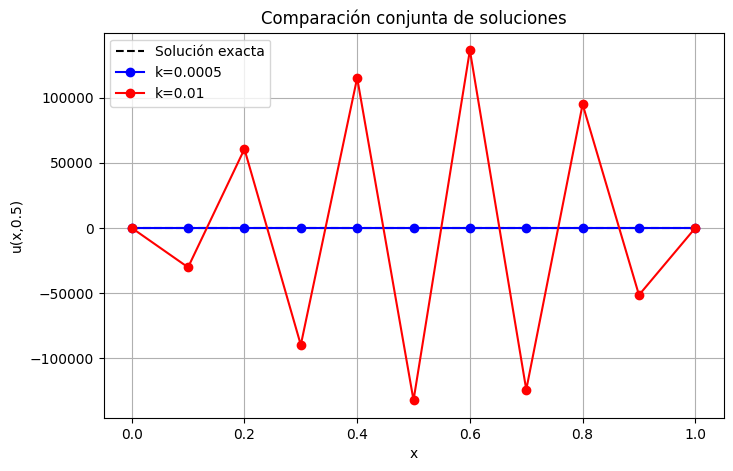

In [27]:
# a) Gráfica caso k=0.0005
plt.figure(figsize=(7,5))
plt.plot(x1, valores_exactos, 'k--', label='Solución exacta')
plt.plot(x1, w1, 'bo-', label='(k=0.0005)')
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación para k=0.0005')
plt.legend()
plt.grid(True)
plt.show()

# b) Gráfica caso k=0.01
plt.figure(figsize=(7,5))
plt.plot(x2, valores_exactos, 'k--', label='Solución exacta')
plt.plot(x2, w2, 'ro-', label='(k=0.01)')
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación para k=0.01')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica conjunta
plt.figure(figsize=(8,5))
plt.plot(x1, valores_exactos, 'k--', label='Solución exacta')
plt.plot(x1, w1, 'bo-', label='k=0.0005')
plt.plot(x2, w2, 'ro-', label='k=0.01')
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación conjunta de soluciones')
plt.legend()
plt.grid(True)
plt.show()



El parámetro de estabilidad del método explícito es:

$$ r = \frac{k}{h^2} $$

- Para $h = 0.1, k = 0.0005: r = 0.05 < 0.5$
- Para $h = 0.1, k = 0.01: r = 1.0 > 0.5$

Cuando se cumple la condición de estabilidad $r \leq 0.5$, el método produce resultados numéricos muy cercanos a la solución analítica. Si se aumenta el paso temporal $k$ demasiado, el método diverge y los resultados se vuelven inestables. En general, reducir $h$ y $k$ mejora la precisión.
